# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = p.read_csv('r_or_f.csv')
df=data.dropna()

In [4]:
df

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,REAL
1,1,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,REAL
2,2,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,REAL
3,3,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,FAKE
4,4,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,REAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,1399,3610,Customer Service Representative,"US, GA, Atlanta",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,FAKE
1400,1400,17542,Payroll Clerk,"US, GA,",Account,35000-40000,Basil Lifecare Pvt. Ltd. is a Wellness &amp; P...,We are seeking a full time Payroll Clerk to ma...,• High school diploma or equivalent• Excellent...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,Entry level,High School or equivalent,Hospital & Health Care,Financial Analyst,FAKE
1401,1401,8691,Payroll Clerk,"US, GA,",Account,35000-40000,Basil Lifecare Pvt. Ltd. is a Wellness &amp; P...,We are seeking a full time Payroll Clerk to ma...,• High school diploma or equivalent• Excellent...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,Entry level,High School or equivalent,Hospital & Health Care,Financial Analyst,FAKE
1402,1402,6565,Accounting Clerk,"US, TX, AUSTIN",ACCT,28000-32000,As the industry’s largest supply contracting c...,"Job DescriptionVerify, obtain approvals and pa...",High School diploma requiredProficient in usin...,"401K, HEALTHCARE PALNS AND MORE",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,FAKE


In [5]:
df.columns

Index(['Unnamed: 0', 'job_id', 'title', 'location', 'department',
       'salary_range', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

Spliting Train/Test:

In [6]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='fraudulent', axis=1)
#Response variable
y = df.loc[:,'fraudulent']  

In [7]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  982
Number of test dataset:  422
Total number of dataset:  1404


In [8]:
df.groupby('fraudulent').describe()

Unnamed: 0                                                         \
                count         mean         std  min     25%     50%      75%   
fraudulent                                                                     
FAKE            702.0  1009.643875  297.592611  3.0  877.25  1052.5  1227.75   
REAL            702.0   393.356125  224.202893  0.0  193.25   401.5   590.75   

                   job_id               ... has_company_logo       \
               max  count         mean  ...              75%  max   
fraudulent                              ...                         
FAKE        1403.0  702.0  7125.800570  ...              1.0  1.0   
REAL         773.0  702.0  8808.428775  ...              1.0  1.0   

           has_questions                                               
                   count      mean       std  min  25%  50%  75%  max  
fraudulent                                                             
FAKE               702.0  0.702279  0.457582  0.0  0.0  1.0  1.0  1.0  
REAL               702.0  0.672365  0.469686  0.0  0.0  1.0  1.0  1.0  

[2 rows x 40 columns]

Text(0.5, 1.0, 'Distribution of fraudulent ')

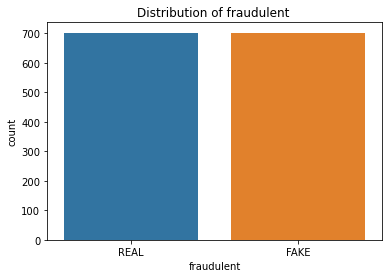

In [9]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "fraudulent", data = df)
df.loc[:, 'fraudulent'].value_counts()
plt.title('Distribution of fraudulent ')

In [10]:
df['fraudulent'].unique()

array(['REAL', 'FAKE'], dtype=object)

Training model:

In [11]:
#!pip install nltk

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURESH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['description']=df['description'].str.strip()
# lowercase the text
df['description'] = df['description'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['description']=df['description'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['description'].split(' '),axis=1)
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [18]:
df.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,employment_type,required_experience,required_education,industry,function,fraudulent,word_tokens,cleaned_text,stemmed,final_text
0,0,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",your responsibilities manage the englishspeaki...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,...,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,REAL,"[your, responsibilities manage, the, englishsp...","[responsibilities manage, englishspeaking, edi...","[responsibilities manag, englishspeak, editori...",responsibilities manag englishspeak editori te...
1,1,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,about vault dragon vault dragon is dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",...,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,REAL,"[about, vault, dragon vault, dragon, is, dropb...","[vault, dragon vault, dragon, dropbox, physica...","[vault, dragon vault, dragon, dropbox, physic,...",vault dragon vault dragon dropbox physic stuff...
2,2,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",urleda2500ddcedb60957fcd7f5b164e092966f8c4e8fb...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,...,Full-time,Executive,Unspecified,Internet,Sales,REAL,[urleda2500ddcedb60957fcd7f5b164e092966f8c4e8f...,[urleda2500ddcedb60957fcd7f5b164e092966f8c4e8f...,[urleda2500ddcedb60957fcd7f5b164e092966f8c4e8f...,urleda2500ddcedb60957fcd7f5b164e092966f8c4e8fb...
3,3,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,icampe technician bakersfield ca mt posoprinc...,"QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,...,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,FAKE,"[icampe, technician, , bakersfield, ca, mt, po...","[icampe, technician, , bakersfield, ca, mt, po...","[icamp, technician, , bakersfield, ca, mt, pos...",icamp technician bakersfield ca mt posoprincip...
4,4,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,the job is to support the growth of the url9f3...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,...,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,REAL,"[the, job, is, to, support, the, growth, of, t...","[job, support, growth, url9f35c886234b8e939f54...","[job, support, growth, url9f35c886234b8e939f54...",job support growth url9f35c886234b8e939f5403fd...


In [14]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'description':],df['fraudulent'],test_size=0.2)

In [15]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in X['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1

In [19]:
vocab

defaultdict(int,
            {'responsibilitiesrecruit': 1,
             'take': 174,
             'candid': 415,
             'interview': 217,
             'processmanag': 1,
             'offic': 175,
             'suppli': 54,
             'snack': 1,
             'mainten': 541,
             'etcschedul': 1,
             'meet': 303,
             'manag': 1214,
             'travelset': 1,
             'conduct': 116,
             'daili': 123,
             'standup': 12,
             'our\xa0oth': 1,
             'unit': 39,
             'statesensur': 1,
             'aspect': 42,
             'cleric': 2,
             'function': 233,
             'appoint': 17,
             'schedul': 76,
             'bill': 30,
             'bookkeep': 2,
             'patient': 12,
             'flow': 40,
             'done': 24,
             'effici': 138,
             'effectivelycollabor': 1,
             'head': 31,
             'organ': 145,
             'well': 205,
             'per

In [16]:
#!pip install wordcloud

Text(0.5, 1.0, '')

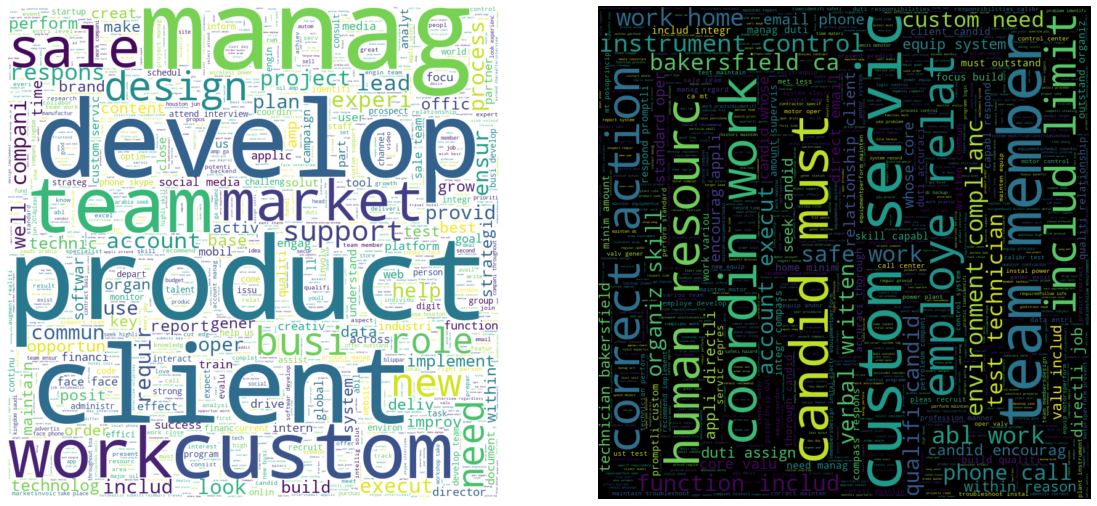

In [17]:
from wordcloud import WordCloud

real=' '.join(X.loc[y=='REAL','final_text'].values)
real_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(real)

fake=' '.join(X.loc[y=='FAKE','final_text'].values)
fake_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(fake)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(real_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(fake_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

